
%%html
<style>
table {float:left}
</style>



### Evaluation of snow retrievals

The evaluation is done using reflectivity simulated from PSDs observed in field campaigns. The reflectivity calculations are described in Chase et al. 2021 ( Chase, R. J., S. W. Nesbitt, and G. M. McFarquhar, 2021: A Dual-Frequency Radar Retrieval of Two Parameters of the Snowfall Particle Size Distribution Using a Neural Network. J. Appl. Meteor. Climatol., 60, 341–359, https://doi.org/10.1175/JAMC-D-20-0177.1.)

A k nearest neighbor regression is used to evaluate the retrievals.  The dataset, which consists of 99999 PSDs, is randomly split in two, with one set used for training and the other for validation

Results

| Rate | NRMS | Test Dataset Mean | Predicted Mean|
|------|------|-------------------|---------------|
|1.0   | 56.4 | 0.99              | 1.14          |
|10.0  | 43.4 | 9.72              | 6.47          |



In [33]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Read the data
fh = nc.Dataset('Unrimed_simulation_wholespecturm_train_V2.nc')  # reflectivity simulated from observed PSD

#calculations are described in Chase, R. J., S. W. Nesbitt, and G. M. McFarquhar, 2021: A Dual-Frequency Radar Retrieval of Two Parameters of the Snowfall Particle Size Distribution Using a Neural Network. J. Appl. Meteor. Climatol., 60, 341–359, https://doi.org/10.1175/JAMC-D-20-0177.1.

zW=fh.variables['Z3'][:]
zKa=fh.variables['Z2'][:]
dm=fh.variables['Dm'][:]
IWC=fh.variables['IWC'][:]
T=fh.variables['T_env'][:]
R=3.64*IWC**1.06

X_obs=np.concatenate((zW[:,np.newaxis],T[:,np.newaxis]),axis=1)

#import train test split from sklearn
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_obs, R, test_size=0.4, random_state=42)

#import sklearn knn regressor
from sklearn.neighbors import KNeighborsRegressor

knnReg=KNeighborsRegressor(n_neighbors=25,weights='distance')
knnReg.fit(X_train,y_train)
y_pred=knnReg.predict(X_test)



Sample size=1761
NRMS= 0.564 Truth= 0.994 Predicted= 1.146 


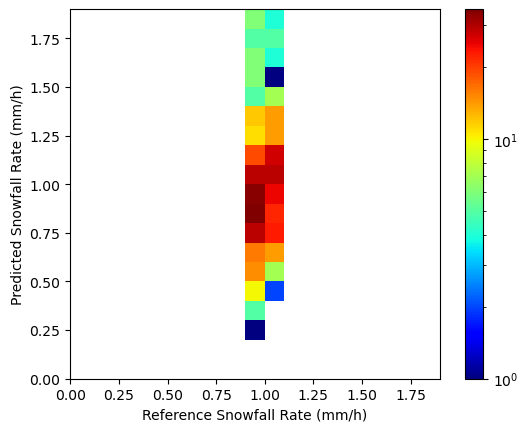

In [26]:
a=np.nonzero(np.abs(y_test-1)<0.1)
b=np.nonzero(X_test[:,1][a]>-10)
print('Sample size=%i'%len(a[0]))
diff_1=((y_test[a][b]-y_pred[a][b])**2).mean()**0.5
#print(diff_1)
ax=plt.subplot(1,1,1)
import matplotlib
plt.hist2d(y_test[a][b],y_pred[a][b],bins=np.arange(20)*0.1,cmap='jet',norm=matplotlib.colors.LogNorm())
ax.set_aspect('equal')
plt.xlabel('Reference Snowfall Rate (mm/h)')
plt.ylabel('Predicted Snowfall Rate (mm/h)')
plt.colorbar()

print('NRMS=%6.3f Truth=%6.3f Predicted=%6.3f '%(diff_1/y_test[a][b].mean(),y_test[a][b].mean(),y_pred[a][b].mean()))


Sample size=137
NRMS= 0.434 Truth= 9.716 Predicted= 6.474 


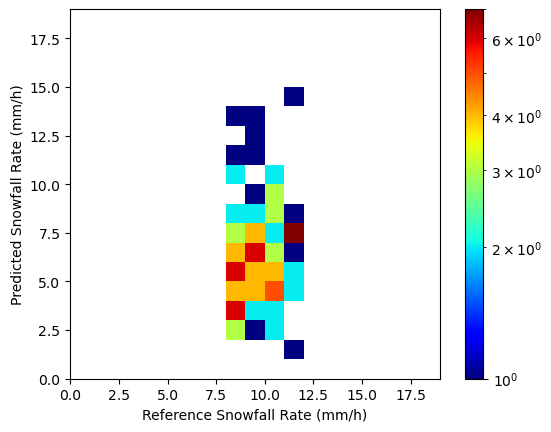

In [29]:
a=np.nonzero(np.abs(y_test-10)<2)
b=np.nonzero(X_test[:,1][a]>-10)
print('Sample size=%i'%len(a[0]))
diff_1=((y_test[a][b]-y_pred[a][b])**2).mean()**0.5
#print(diff_1/X_test[:,0][a][b].mean())
ax=plt.subplot(1,1,1)
import matplotlib
plt.hist2d(y_test[a][b],y_pred[a][b],bins=np.arange(20)*1,cmap='jet',norm=matplotlib.colors.LogNorm())
ax.set_aspect('equal')
plt.xlabel('Reference Snowfall Rate (mm/h)')
plt.ylabel('Predicted Snowfall Rate (mm/h)')
#print(y_pred[a][b].mean())
#print(y_test[a][b].mean())
plt.colorbar()
#print(np.corrcoef(y_test[a][b],y_pred[a][b]))
print('NRMS=%6.3f Truth=%6.3f Predicted=%6.3f '%(diff_1/y_test[a][b].mean(),y_test[a][b].mean(),y_pred[a][b].mean()))


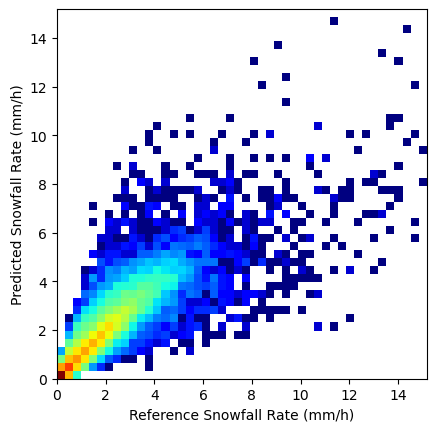

In [40]:
ax=plt.subplot(1,1,1)
plt.hist2d(y_test,y_pred,bins=np.arange(47)*0.33,cmap='jet',norm=matplotlib.colors.LogNorm())
ax.set_aspect('equal')
plt.xlabel('Reference Snowfall Rate (mm/h)')
plt.ylabel('Predicted Snowfall Rate (mm/h)')
ax.set_aspect('equal')